In [1]:
# !pip install easyocr
# !pip install imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np

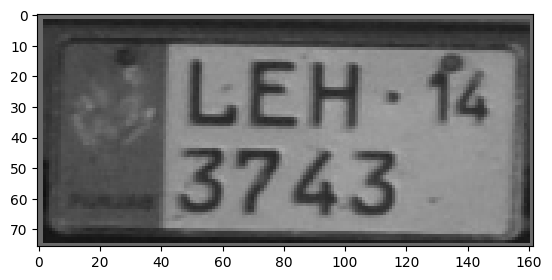

In [2]:
img = cv2.imread("C:\\Users\\DELL\\Desktop\\nhihoraha\\cropped.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) 

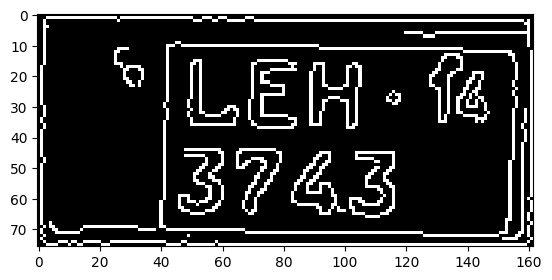

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [4]:
import imutils

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10, True)
    if len(approx)==4:
        location = approx
        break

In [6]:
location

array([[[ 42,  10]],

       [[ 40,  69]],

       [[153,  71]],

       [[154,  12]]], dtype=int32)

In [7]:
# mask = np.zeros(gray.shape, np.uint8)
# new_image = cv2.drawContours(mask, [location], 0, 255, -1)
# new_image = cv2.bitwise_and(img, img, mask=mask)

# Create a binary mask for the largest contour
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [contours[0]], 0, 255, -1)

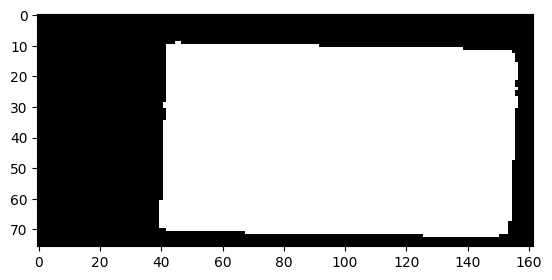

In [8]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [10]:
# (x,y) = np.where(mask==255)
# (x1,y1) = (np.min(x), np.min(y))
# (x2,y2) = (np.max(x), np.max(y))
# new_imagee = gray[x1:x2+1, y1:y2+1]

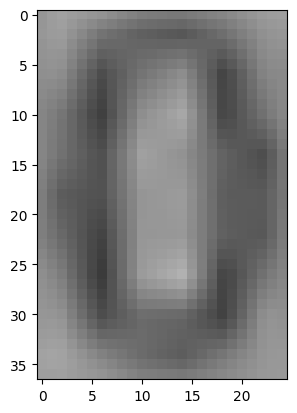

In [11]:
# plt.imshow(cv2.cvtColor(new_imagee, cv2.COLOR_BGR2RGB))

In [9]:
# import easyocr
# reader = easyocr.Reader(['en'])
# result = reader.readtext(new_image)
# result

# Find connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

In [10]:
# Create an array to store the cropped regions
cropped_regions = []

# Loop through each connected component (excluding background label)
for label in range(1, num_labels):
    x, y, w, h, area = stats[label]

    # Extract the connected component
    component = gray[y:y+h, x:x+w]

    # Append the component to the list
    cropped_regions.append(component)

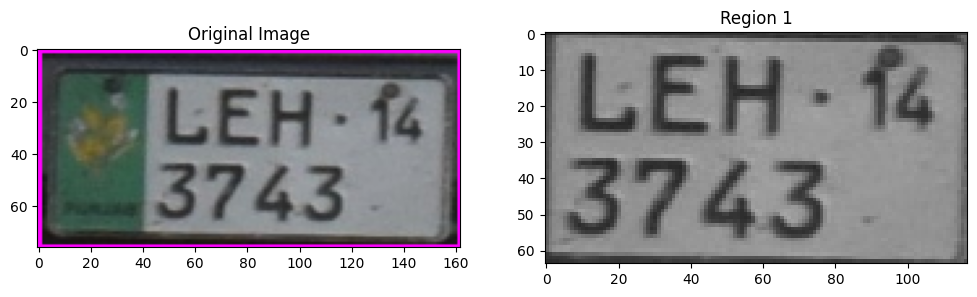

In [11]:
# Display the result
fig, axs = plt.subplots(1, len(cropped_regions) + 1, figsize=(12, 4))

# Display the original image
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')

# Display each cropped region
for i, region in enumerate(cropped_regions):
    axs[i + 1].imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
    axs[i + 1].set_title(f'Region {i + 1}')

plt.show()